In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("pax_all_agreements_data.csv")
data

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,1
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,1,1
2,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,2,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,...,0,0,0,0,1,1,0,0,0,1
3,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,1,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,...,0,0,0,1,0,0,0,0,1,1
4,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,1,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,Yemen,Government/territory,122,Yemen unification process,Middle East and North Africa,250,1,Agreement on a Ceasefire in the Republic of Yemen,1994-06-30,Multiparty signed/agreed,...,0,0,0,0,0,1,0,0,0,1
1864,Yemen,Territory,122,Yemen unification process,Middle East and North Africa,264,1,Agreement Establishing a Union between the Sta...,1990-04-22,Multiparty signed/agreed,...,0,0,0,1,0,0,0,0,0,1
1865,Zimbabwe,Government,124,Zimbabwe post-election process,Africa (excl MENA),1340,1,Constitution of Zimbabwe Amendment (No 20) 2013,2013-03-19,Multiparty signed/agreed,...,0,0,0,3,0,0,0,0,0,1
1866,Zimbabwe,Government,124,Zimbabwe post-election process,Africa (excl MENA),826,1,Agreement between the Zimbabwe African Nationa...,2008-09-15,Multiparty signed/agreed,...,0,0,0,1,0,1,0,0,1,1


In [3]:
data = data.loc[(data['Reg'] == "Africa (excl MENA)") | (data['Reg'] == "Middle East and North Africa")]
data1 = data[["Con","Reg"]]
data2 = data1.groupby(["Con"]).count()
np.sum(data2['Reg'])


847

In [4]:
d = list(data2["Reg"])
print(d)

[6, 12, 2, 1, 1, 1, 5, 26, 2, 43, 1, 1, 6, 6, 8, 19, 21, 2, 1, 3, 3, 1, 8, 1, 1, 1, 1, 5, 4, 4, 1, 2, 6, 5, 1, 1, 4, 2, 28, 25, 3, 2, 5, 30, 39, 11, 10, 19, 4, 3, 8, 13, 4, 2, 4, 6, 5, 1, 10, 3, 8, 1, 2, 2, 9, 41, 8, 1, 11, 51, 1, 44, 1, 2, 14, 6, 21, 1, 1, 1, 1, 93, 3, 1, 17, 50, 3]


In [5]:
data2.insert(1,"Sum",[i for i in d])
data2 = data2.drop(["Reg"],axis = 1)
data2

,Sum
Con,
Algeria,6
Angola,12
Angola/Burundi/Central African Republic/Democratic Republic of Congo/Kenya/Republic of Congo/Rwanda/Sudan/Tanzania/Uganda/Zambia/(African Great Lakes),2
Angola/Burundi/Central African Republic/Democratic Republic of Congo/Republic of Congo/Rwanda/South Africa/South Sudan/Tanzania/Uganda/Zambia/(African Great Lakes),1
Angola/Cabinda,1
...,...
Togo,3
Tunisia,1
Uganda,17


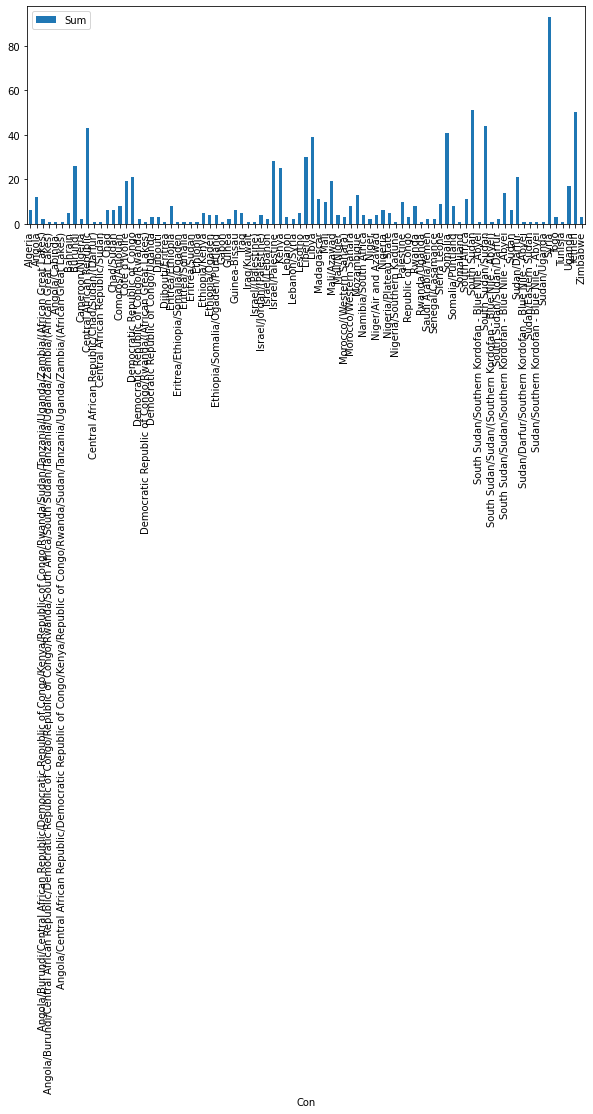

In [6]:
data2[["Sum"]].plot(kind='bar', figsize=(10, 4))

In [7]:
#data3 = data2.set_index("Con",inplace = False)
con_data = data2.loc[data2['Sum']>20]
con_data

,Sum
Con,
Burundi,26
Central African Republic,43
Democratic Republic of Congo,21
Israel/Palestine,28
Kenya,25
Liberia,30
Libya,39
Somalia,41
South Sudan,51


In [8]:
conTime = data.set_index("PP",inplace = False)

In [9]:
conTime = conTime.loc[(conTime['Con']=="Libya")|(conTime['Con']=="South Sudan") |(conTime['Con']=="Syria")|(conTime['Con']=="Yemen")]
conTime

,Con,Contp,PPName,Reg,AgtId,Ver,Agt,Dat,Status,Lgt,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
PP,,,,,,,,,,,,,,,,,,,,,
72,Libya,Inter-group,Libyan local processes,Middle East and North Africa,2217,2,Statement from the Sheikhs and Dignitaries of ...,2019-01-22,Multiparty signed/agreed,1,...,0,0,0,1,0,0,0,0,0,1
70,Libya,Government,Libyan peace process,Middle East and North Africa,2230,2,"Palermo Conference for and with Libya, Conclus...",2018-11-13,Multiparty signed/agreed,3,...,0,0,0,1,1,0,1,0,0,1
70,Libya,Inter-group,Libyan peace process,Middle East and North Africa,2143,2,Ceasefire in Southern Tripoli,2018-09-28,Unilateral document,1,...,0,0,0,0,0,0,0,0,0,1
72,Libya,Inter-group,Libyan local processes,Middle East and North Africa,2229,2,Meeting Minutes\r\n,2018-09-23,Multiparty signed/agreed,1,...,0,0,0,0,0,0,0,1,0,1
70,Libya,Government,Libyan peace process,Middle East and North Africa,2216,2,Agreement [Ceasefire between Tripoli and Tarho...,2018-09-21,Multiparty signed/agreed,3,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Yemen,Government,Yemen peace process,Middle East and North Africa,1402,1,"Presidential Decree No. (24) FY 2011, 12 Septe...",2011-09-12,Unilateral document,1,...,0,0,0,0,0,0,0,0,0,1
123,Yemen,Government,Yemen peace process,Middle East and North Africa,1434,1,Six-Point Government of Yemen-Houthi Ceasefire...,2010-02-12,Multiparty signed/agreed,1,...,0,0,0,0,0,0,0,0,0,1
123,Yemen,Government,Yemen peace process,Middle East and North Africa,1433,1,Doha Agreement,2008-02-01,Multiparty signed/agreed,1,...,2,0,1,0,0,0,0,0,0,1


In [10]:
conTime = conTime[["Dat","Con"]]
conTime = conTime.sort_values(by =["Dat"])
conTime = conTime.reset_index(drop=False)
#conTime = conTime.set_index("Dat",inplace = False)
#conTime

In [11]:
da = list(conTime["Dat"])
f = [i.split("-")[0] for i in da]
conTime.insert(0,"Year",[i for i in f])
conTime.drop("Dat",axis = 1)

,Year,PP,Con
0,1990,122,Yemen
1,1994,122,Yemen
2,1999,24,South Sudan
3,1999,24,South Sudan
4,1999,24,South Sudan
...,...,...,...
228,2019,123,Yemen
229,2019,107,South Sudan
230,2020,107,South Sudan
231,2020,107,South Sudan


In [12]:
conTime1 = conTime["PP"].groupby([conTime["Year"],conTime["Con"]])

In [13]:
conTime1 = conTime1.count()
conTime1

Year  Con        
1990  Yemen           1
1994  Yemen           1
1999  South Sudan     4
2000  South Sudan     1
2002  South Sudan     1
2006  South Sudan     1
2008  Yemen           1
2010  Yemen           1
2011  Libya           1
      South Sudan     1
      Yemen           4
2012  South Sudan     2
      Syria           5
2013  South Sudan     1
      Syria           3
2014  South Sudan    10
      Syria           8
      Yemen          19
2015  Libya           7
      South Sudan     6
      Syria          13
      Yemen           3
2016  Libya           6
      South Sudan     2
      Syria          17
      Yemen          10
2017  Libya           8
      South Sudan     9
      Syria          28
2018  Libya          16
      South Sudan     6
      Syria          16
      Yemen           6
2019  Libya           1
      South Sudan     4
      Syria           3
      Yemen           4
2020  South Sudan     3
Name: PP, dtype: int64

In [14]:
#conTime.pivot(index='Year', columns='Con', values='baz')

In [15]:
conTime2 = conTime1.unstack()

In [16]:
conTime2 = conTime2.fillna(0)
conTime2

Con,Libya,South Sudan,Syria,Yemen
Year,,,,
1990,0.0,0.0,0.0,1.0
1994,0.0,0.0,0.0,1.0
1999,0.0,4.0,0.0,0.0
2000,0.0,1.0,0.0,0.0
2002,0.0,1.0,0.0,0.0
2006,0.0,1.0,0.0,0.0
2008,0.0,0.0,0.0,1.0
2010,0.0,0.0,0.0,1.0
2011,1.0,1.0,0.0,4.0


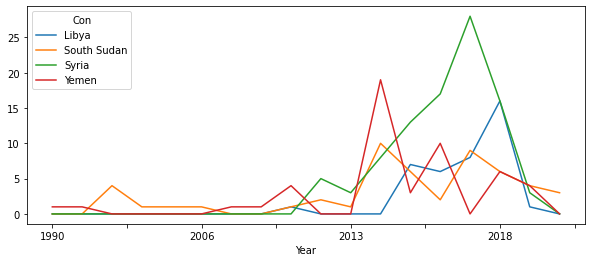

In [17]:
conTime2[["Libya","South Sudan","Syria","Yemen"]].plot(kind='line', figsize=(10, 4))

In [18]:
conTime4 = conTime2[8:]
conTime4

Con,Libya,South Sudan,Syria,Yemen
Year,,,,
2011,1.0,1.0,0.0,4.0
2012,0.0,2.0,5.0,0.0
2013,0.0,1.0,3.0,0.0
2014,0.0,10.0,8.0,19.0
2015,7.0,6.0,13.0,3.0
2016,6.0,2.0,17.0,10.0
2017,8.0,9.0,28.0,0.0
2018,16.0,6.0,16.0,6.0
2019,1.0,4.0,3.0,4.0


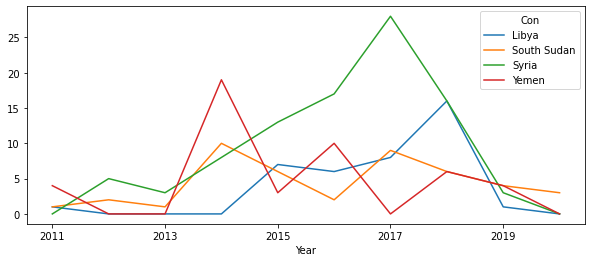

In [19]:
conTime4[["Libya","South Sudan","Syria","Yemen"]].plot(kind='line', figsize=(10, 4))

In [20]:
conTime4.to_csv("d.csv")